In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sp
#%matplotlib widget
import serial,socket,os,glob,sys
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys,glob
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
import tifffile as tif
import skimage as sk
from IPython.display import Latex
from funciones_wake import *
from scipy.signal import find_peaks


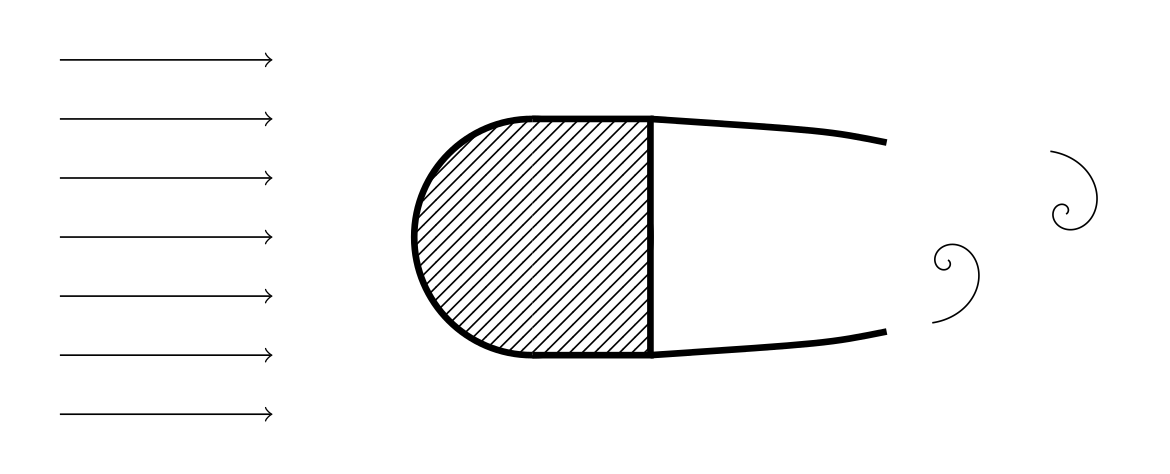

In [2]:
if __name__ == "__main__":
    file_name = "medidas/Dshape_e00_L000_deltaV0_0"
    modified_date = get_modified_date(file_name)
    print(modified_date[1])

1724939542.2217321


In [3]:
beta_nL(0),freq_elast(beta_nL(0),5e-2,45e-5,1300,75)

(1.8751040687120684, 15.206694613354841)

In [4]:
rho = 1.2
Lspan= 35e-2
D = 5e-2
Sf = Lspan*D
nu = 15e-6

In [5]:
lista_soporte = np.sort(glob.glob('medidas/Dshape_soporte_V*'))
caso_soporte = caso_drag(lista_soporte)
lista_referencia = np.sort(glob.glob('medidas/Dshape_e00*'))
caso_referencia = caso_drag(lista_referencia)
lista_e50_L075 = np.sort(glob.glob('medidas/Dshape_e50_L075*'))
caso_e50_L075 = caso_drag(lista_e50_L075)
lista_e50_L100 = np.sort(glob.glob('medidas/Dshape_e50_L100*'))
caso_e50_L100 = caso_drag(lista_e50_L100)
lista_e50_L125 = np.sort(glob.glob('medidas/Dshape_e50_L125*'))
caso_e50_L125 = caso_drag(lista_e50_L125)
lista_e50_L150 = np.sort(glob.glob('medidas/Dshape_e50_L150*'))
caso_e50_L150 = caso_drag(lista_e50_L150)



lista_e75_L075 = np.sort(glob.glob('medidas/Dshape_e75_L075*'))
caso_e75_L075 = caso_drag(lista_e75_L075)
lista_e75_L100 = np.sort(glob.glob('medidas/Dshape_e75_L100*'))
caso_e75_L100 = caso_drag(lista_e75_L100)
lista_e75_L125 = np.sort(glob.glob('medidas/Dshape_e75_L125*'))
caso_e75_L125 = caso_drag(lista_e75_L125)
lista_e75_L150 = np.sort(glob.glob('medidas/Dshape_e75_L150*'))
caso_e75_L150 = caso_drag(lista_e75_L150)


lista_e1000_L075 = np.sort(glob.glob('medidas/Dshape_e1000_L075*'))
caso_e1000_L075 = caso_drag(lista_e1000_L075)
lista_e1000_L100 = np.sort(glob.glob('medidas/Dshape_e1000_L100*'))
caso_e1000_L100 = caso_drag(lista_e1000_L100)
lista_e1000_L125 = np.sort(glob.glob('medidas/Dshape_e1000_L125*'))
caso_e1000_L125 = caso_drag(lista_e1000_L125)
lista_e1000_L150 = np.sort(glob.glob('medidas/Dshape_e1000_L150*'))
caso_e1000_L150 = caso_drag(lista_e1000_L150)




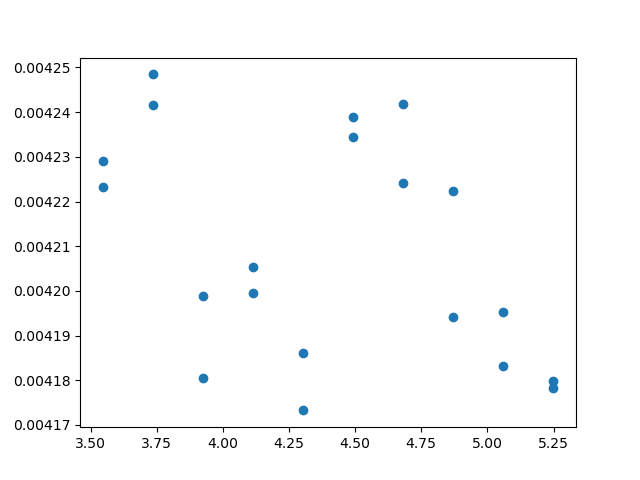

In [6]:
fig,ax = plt.subplots()

FD_s = caso_soporte.df['FD_m'][caso_soporte.index_casos]
U_s = caso_soporte.df['velocity'][caso_soporte.index_casos]
ax.plot(U_s,FD_s/U_s**2,'o')
#ax.set_ylim([0,2])




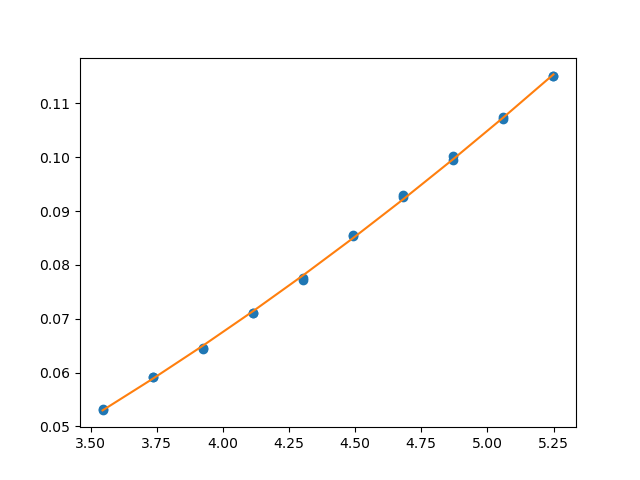

In [7]:
fig,ax = plt.subplots()

FD_s_soporte = caso_soporte.df['FD_m'][caso_soporte.index_casos]
U_s_soporte = caso_soporte.df['velocity'][caso_soporte.index_casos]

p1_soporte = np.polyfit(U_s_soporte,FD_s_soporte,2)
F_soporte = np.poly1d(p1_soporte)

ax.plot(U_s_soporte,FD_s_soporte,'o')
ax.plot(U_s_soporte,F_soporte(U_s_soporte))
#ax.set_ylim([0,2])

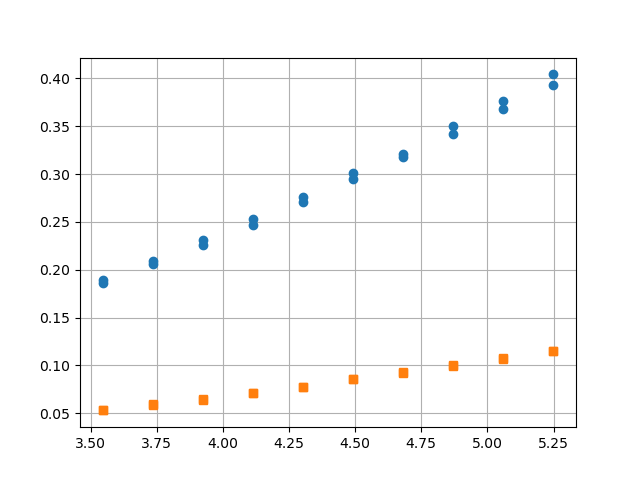

In [8]:
fig,ax = plt.subplots()

FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
ax.plot(U_s_referencia,FD_s_referencia,'o')
ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()

Text(0.5, 0, 'Re')

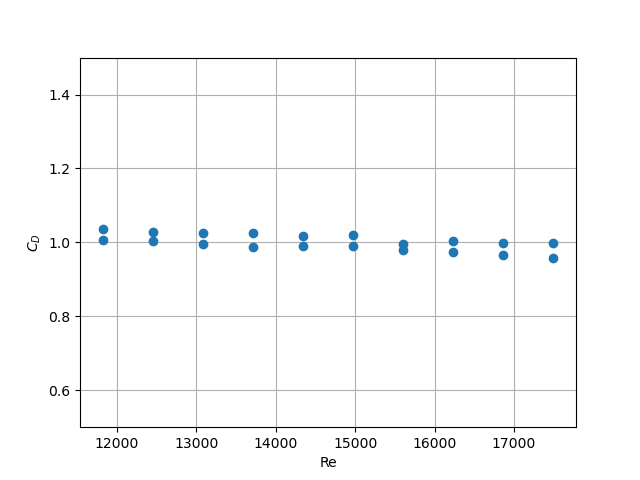

In [9]:
fig,ax = plt.subplots()

FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia*D/nu,FD_0/U_s_referencia**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
ax.set_ylim([0.5,1.5])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re')

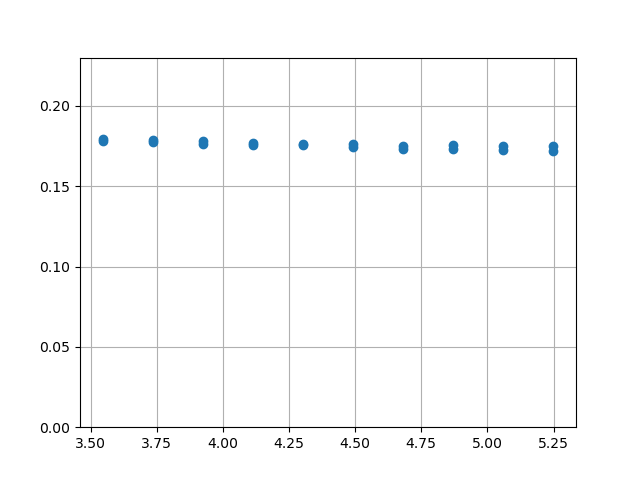

In [10]:
caso_referencia.freq_strouhal()
fr_strouhal_s = np.zeros_like(U_s_referencia)
for i,fr_st in enumerate(caso_referencia.strouhal_freq):
    fr_strouhal_s[i] = fr_st[0]
fig,ax = plt.subplots()
ax.plot(U_s_referencia,fr_strouhal_s/U_s_referencia*D,'o')
ax.set_ylim([0,0.23]);
ax.grid()

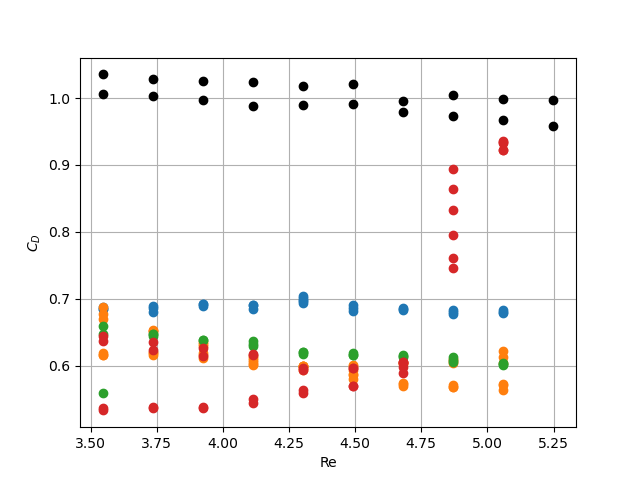

In [11]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e50_L075 = caso_e50_L075.df['FD_m'][caso_e50_L075.index_casos]
U_s_e50_L075 = caso_e50_L075.df['velocity'][caso_e50_L075.index_casos]
FD_0 =  FD_s_e50_L075-F_soporte(U_s_e50_L075)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L075,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')


FD_s_e50_L100 = caso_e50_L100.df['FD_m'][caso_e50_L100.index_casos]
U_s_e50_L100 = caso_e50_L100.df['velocity'][caso_e50_L100.index_casos]
FD_0 =  FD_s_e50_L100-F_soporte(U_s_e50_L100)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L100,FD_0/U_s_e50_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e50_L125 = caso_e50_L125.df['FD_m'][caso_e50_L125.index_casos]
U_s_e50_L125 = caso_e50_L125.df['velocity'][caso_e50_L125.index_casos]
FD_0 =  FD_s_e50_L125-F_soporte(U_s_e50_L125)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L125,FD_0/U_s_e50_L125**2/Sf/rho/0.5,'o')

FD_s_e50_L150 = caso_e50_L150.df['FD_m'][caso_e50_L150.index_casos]
U_s_e50_L150 = caso_e50_L150.df['velocity'][caso_e50_L150.index_casos]
FD_0 =  FD_s_e50_L150-F_soporte(U_s_e50_L150)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L150,FD_0/U_s_e50_L150**2/Sf/rho/0.5,'o')

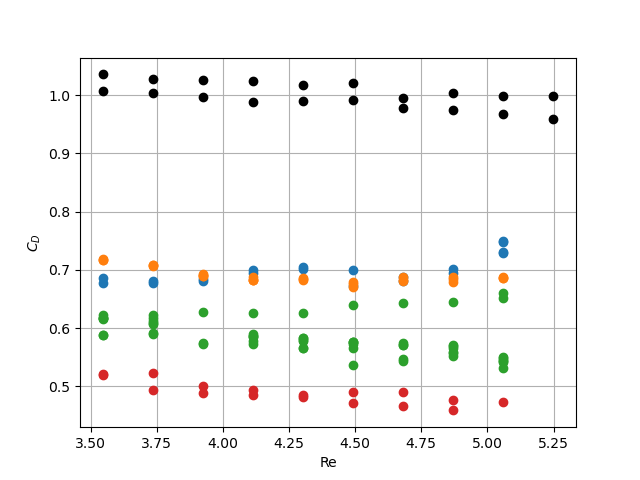

In [12]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e75_L075 = caso_e75_L075.df['FD_m'][caso_e75_L075.index_casos]
U_s_e75_L075 = caso_e75_L075.df['velocity'][caso_e75_L075.index_casos]
FD_0 =  FD_s_e75_L075-F_soporte(U_s_e75_L075)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L075,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')


FD_s_e75_L100 = caso_e75_L100.df['FD_m'][caso_e75_L100.index_casos]
U_s_e75_L100 = caso_e75_L100.df['velocity'][caso_e75_L100.index_casos]
FD_0 =  FD_s_e75_L100-F_soporte(U_s_e75_L100)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L100,FD_0/U_s_e75_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e75_L125 = caso_e75_L125.df['FD_m'][caso_e75_L125.index_casos]
U_s_e75_L125 = caso_e75_L125.df['velocity'][caso_e75_L125.index_casos]
FD_0 =  FD_s_e75_L125-F_soporte(U_s_e75_L125)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L125,FD_0/U_s_e75_L125**2/Sf/rho/0.5,'o')

FD_s_e75_L150 = caso_e75_L150.df['FD_m'][caso_e75_L150.index_casos]
U_s_e75_L150 = caso_e75_L150.df['velocity'][caso_e75_L150.index_casos]
FD_0 =  FD_s_e75_L150-F_soporte(U_s_e75_L150)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L150,FD_0/U_s_e75_L150**2/Sf/rho/0.5,'o')

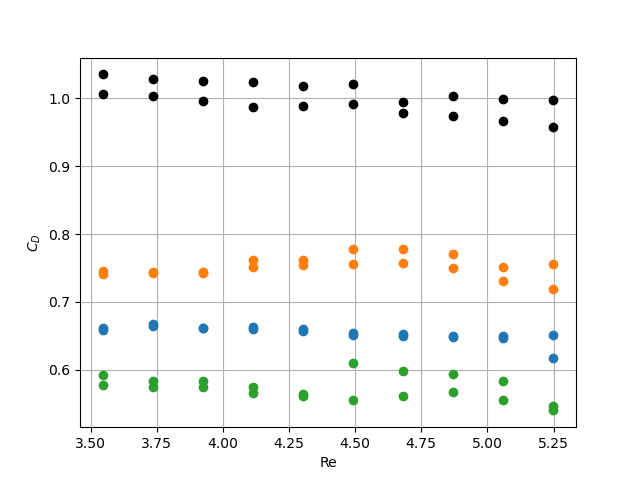

In [13]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e1000_L075 = caso_e1000_L075.df['FD_m'][caso_e1000_L075.index_casos]
U_s_e1000_L075 = caso_e1000_L075.df['velocity'][caso_e1000_L075.index_casos]
FD_0 =  FD_s_e1000_L075-F_soporte(U_s_e1000_L075)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L075,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')


FD_s_e1000_L100 = caso_e1000_L100.df['FD_m'][caso_e1000_L100.index_casos]
U_s_e1000_L100 = caso_e1000_L100.df['velocity'][caso_e1000_L100.index_casos]
FD_0 =  FD_s_e1000_L100-F_soporte(U_s_e1000_L100)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
#x.plot(U_s_e1000_L100,FD_0/U_s_e1000_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e1000_L125 = caso_e1000_L125.df['FD_m'][caso_e1000_L125.index_casos]
U_s_e1000_L125 = caso_e1000_L125.df['velocity'][caso_e1000_L125.index_casos]
FD_0 =  FD_s_e1000_L125-F_soporte(U_s_e1000_L125)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L125,FD_0/U_s_e1000_L125**2/Sf/rho/0.5,'o')

FD_s_e1000_L150 = caso_e1000_L150.df['FD_m'][caso_e1000_L150.index_casos]
U_s_e1000_L150 = caso_e1000_L150.df['velocity'][caso_e1000_L150.index_casos]
FD_0 =  FD_s_e1000_L150-F_soporte(U_s_e1000_L150)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L150,FD_0/U_s_e1000_L150**2/Sf/rho/0.5,'o')

,file,time creation,time_ind,volt,velocity,index_file_ref,file_ref,FD_m
0,medidas/Dshape_e1000_L125_deltaV0_1,Thu Aug 29 16:21:30 2024,1.724959e+09,0.0,0.0000,0.0,medidas/Dshape_e1000_L125_deltaV0_1,0.000000
1,medidas/Dshape_e1000_L125_deltaV0_2,Thu Aug 29 16:22:13 2024,1.724959e+09,0.0,0.0000,1.0,medidas/Dshape_e1000_L125_deltaV0_2,0.000000
2,medidas/Dshape_e1000_L125_deltaV40_0,Thu Aug 29 16:19:54 2024,1.724959e+09,40.0,3.5450,0.0,medidas/Dshape_e1000_L125_deltaV0_1,0.151414
3,medidas/Dshape_e1000_L125_deltaV40_1,Thu Aug 29 16:23:52 2024,1.724959e+09,40.0,3.5450,1.0,medidas/Dshape_e1000_L125_deltaV0_2,0.150755
4,medidas/Dshape_e1000_L125_deltaV42_0,Thu Aug 29 16:19:08 2024,1.724959e+09,42.0,3.7344,0.0,medidas/Dshape_e1000_L125_deltaV0_1,0.167699
5,medidas/Dshape_e1000_L125_deltaV42_1,Thu Aug 29 16:24:36 2024,1.724959e+09,42.0,3.7344,1.0,medidas/Dshape_e1000_L125_deltaV0_2,0.167539
6,medidas/Dshape_e1000_L125_deltaV44_0,Thu Aug 29 16:18:24 2024,1.724959e+09,44.0,3.9238,0.0,medidas/Dshape_e1000_L125_deltaV0_1,0.185129
7,medidas/Dshape_e1000_L125_deltaV44_1,Thu Aug 29 16:25:28 2024,1.724960e+09,44.0,3.9238,1.0,medidas/Dshape_e1000_L125_deltaV0_2,0.185194
8,medidas/Dshape_e1000_L125_deltaV46_0,Thu Aug 29 16:17:41 2024,1.724959e+09,46.0,4.1132,0.0,medidas/Dshape_e1000_L125_deltaV0_1,0.206670
9,medidas/Dshape_e1000_L125_deltaV46_1,Thu Aug 29 16:26:23 2024,1.724960e+09,46.0,4.1132,1.0,medidas/Dshape_e1000_L125_deltaV0_2,0.204955
